# Results Advanced

Coba result objects containa number of useful features to make quick analysis easier. Below we cover:

1. Results With Missing Evaluations
2. Results With Evaluations of different Lengths
3. Plotting with Respect to Custom Variables
4. Overlaying Result Plots
5. Plotting Direct Comparisons
6. Adjusting Moving Average
7. Determining Error Bars

## 1. Results with Missing Evaluations

Here we create a result that is missing any interactions evaluating env1 on lrn1:

In [1]:
import coba as cb

env0 = cb.Environments.from_linear_synthetic(100,seed=1)[0]
env1 = cb.Environments.from_linear_synthetic(100,seed=2)[0]
lrn0 = cb.RandomLearner()
lrn1 = cb.RandomLearner()

result = cb.Experiment([(env0,lrn0),(env1,lrn0),(env0,lrn1)]).run(quiet=True)

### Analysis
After creating our result we can print it to see that it has all of our learners and environemnts

In [2]:
print(result)

{'Learners': 2, 'Environments': 2, 'Interactions': 400}


However, when we ask it to plot we receive a notification in addition to the plot:

`We removed 1 environment_id because it did not exist for every full_name.
`

We removed 1 environment_id because it did not exist for every full_name.


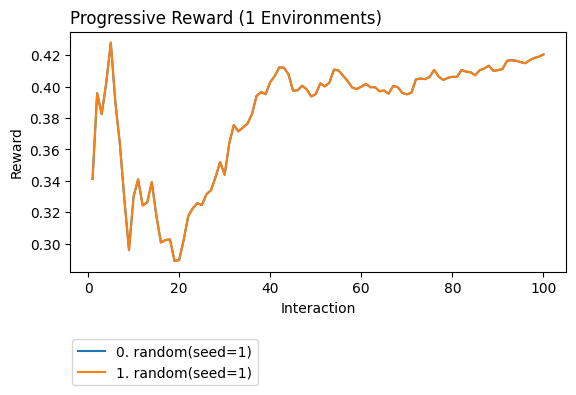

In [13]:
result.plot_learners()

When we ask Coba to plot a result it checks and makes sure all plotted learners have the same environments completed. If this is not the case then coba removes the environments that aren't completed by all learners before plotting. We can disable this functionality by setting `p=None`. We see below that even though the two learners are identical we now get different plotted results due to learner 0 showing the average performance across two environments.

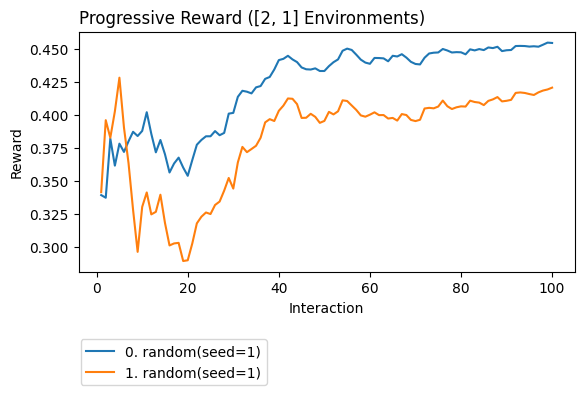

In [12]:
result.plot_learners(p=None)

Alternatively, we could also remove learner 1 from result to see learner 0 performance on environments.

Removing learner 1 means that all learners (now only learner 0) are completed for all environments (environment 0 and 1).

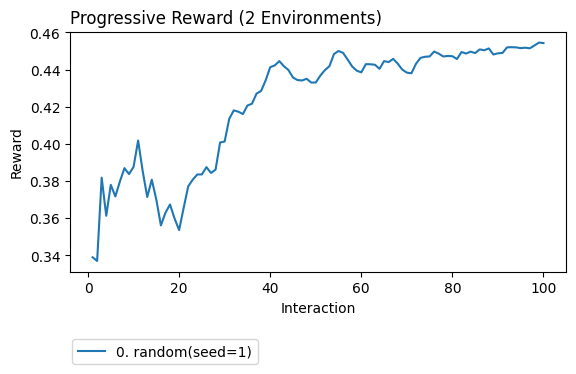

In [4]:
result.where(learner_id=0).plot_learners()

Finally, we can filter to equally completed evaluations by using `where_fin(l,p)` (short for where_finished). 

Coba will remove all `p` from the result where one `l` does not exist for every `p`.

The variable `p` is short hand for pairings. That is, on what variables `p` do we want to "pair" `l`.

In [14]:
result = result.where_fin(l='learner_id',p='environment_id')

We removed 1 environment_id because it did not exist for every learner_id.


## 2. Results with Evaluations of Different Lengths

Here we create a result with one environment made up of 100 interactions and one environment with 200 interactions:

In [32]:
import coba as cb

env0 = cb.Environments.from_linear_synthetic(100,seed=1)[0]
env1 = cb.Environments.from_linear_synthetic(200,seed=2)[0]
lrn0 = cb.RandomLearner()
lrn1 = cb.RandomLearner()

result = cb.Experiment([env0,env1],[lrn0,lrn1]).run(quiet=True)

### Analysis
After creating our result we can print it to see that it has all of our learners and environemnts and interactions

In [18]:
print(result)

{'Learners': 2, 'Environments': 2, 'Interactions': 600}


When we ask Coba to plot we receive a notification in addition to the plot:

`We shortened 2 learner evaluations because they were longer than the shortest environment`

We shortened 2 learner evaluations because they were longer than the shortest environment.


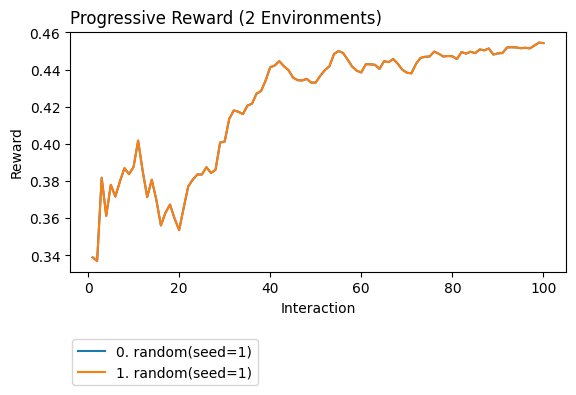

In [19]:
result.plot_learners()

This is similar to the missing environment use case except now we have indexes that only exist in specific environments.

Once again we can force this constraint to be ignored by setting `p=None`. 

When we do this we see a sudden and drastic change at x=100 due to the data from 100-200 only coming from a single environment. 

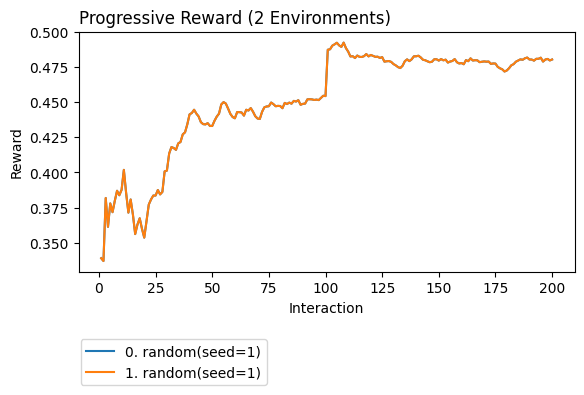

In [20]:
result.plot_learners(p=None)

A better way to fix this problem is to either explicitly remove short environments or use `where_fin(n_interactions)`.

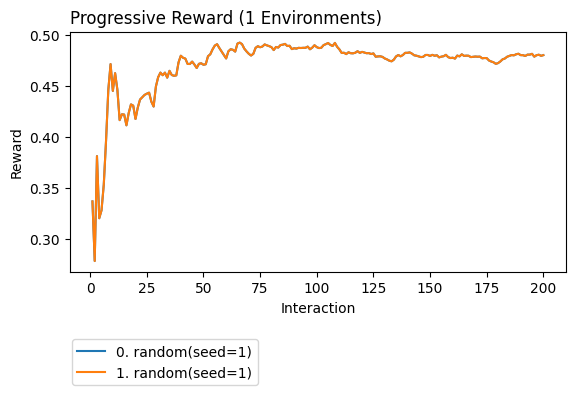

We removed 2 learner evaluations because they were shorter than 200 interactions.


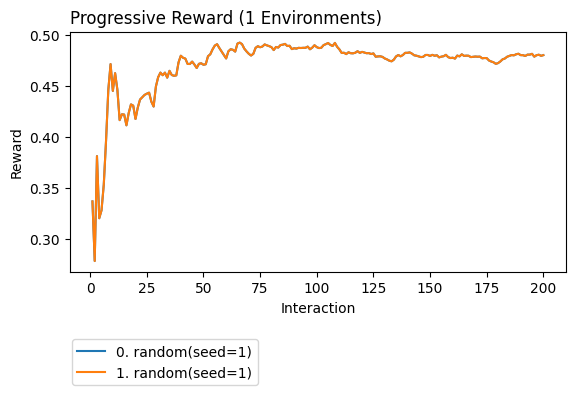

In [26]:
result.where(environment_id=1).plot_learners()
result.where_fin(200).plot_learners()

When using `where_fin(n_interactions)` coba will remove environments that don't contain at least `n_interactions` and drop interactions from environments with more than `n_interactions`. Notice below that after applying `where_fin(150)` our result now only has 300 interactions (i.e., 150 from each of the environment 1 evaluations).

In [30]:
result.where_fin(150)

We removed 2 learner evaluations because they were shorter than 150 interactions.
We shortened 2 learner evaluations because they were longer than the shortest environment.
{'Learners': 2, 'Environments': 1, 'Interactions': 300}


## 3. Plotting with Respect to Custom Variables
Often we are interested in performance with respect to specific variables. 

Here we create two environments with different numbers of actions so we can see how a learner performs with respect to action count.

In [1]:
import coba as cb

env0 = cb.Environments.from_linear_synthetic(100,n_actions=2,seed=1).binary().shuffle(n=5)
env1 = cb.Environments.from_linear_synthetic(100,n_actions=5,seed=2).binary().shuffle(n=5)
lrn0 = cb.RandomLearner()

result = cb.Experiment(env0+env1,lrn0).run(quiet=True)

We can look at the environments table to see what variables we could plot on and we see `n_actions`.

In [15]:
result.environments.to_pandas()

,environment_id,binary,env_type,n_actions,n_coeff,reward_features,seed,shuffle
0,0,True,LinearSynthetic,2,5,"[a, xa]",1,0
1,1,True,LinearSynthetic,2,5,"[a, xa]",1,1
2,2,True,LinearSynthetic,2,5,"[a, xa]",1,2
3,3,True,LinearSynthetic,2,5,"[a, xa]",1,3
4,4,True,LinearSynthetic,2,5,"[a, xa]",1,4
5,5,True,LinearSynthetic,5,5,"[a, xa]",2,0
6,6,True,LinearSynthetic,5,5,"[a, xa]",2,1
7,7,True,LinearSynthetic,5,5,"[a, xa]",2,2
8,8,True,LinearSynthetic,5,5,"[a, xa]",2,3
9,9,True,LinearSynthetic,5,5,"[a, xa]",2,4


Based on this we can set the plot's label to `l='n_actions'` and set `p=None` so that coba doesn't try to remove missing environments

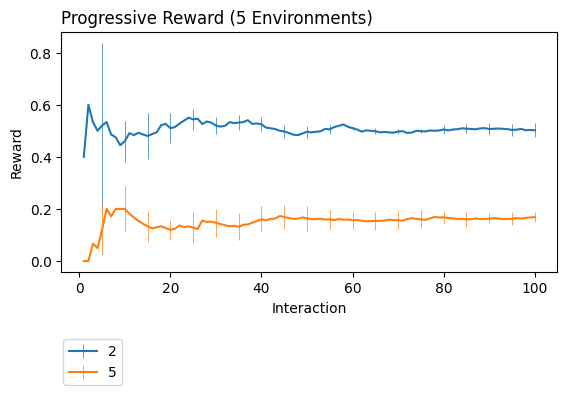

In [4]:
result.plot_learners(l='n_actions',p=None,err='se')

We could set the x-axis to `n_actions` as well which collapses down to the right-most reward value

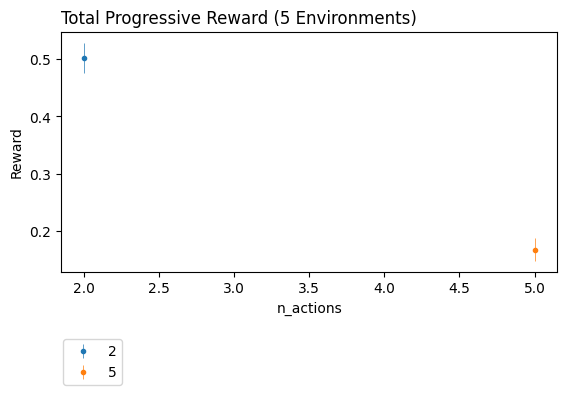

In [3]:
result.plot_learners(x='n_actions',l='n_actions',p=None,err='se')

It also possible to create plots with respect to collections of variables across`environments`, `learners`, `evaluators` and `interactions`.

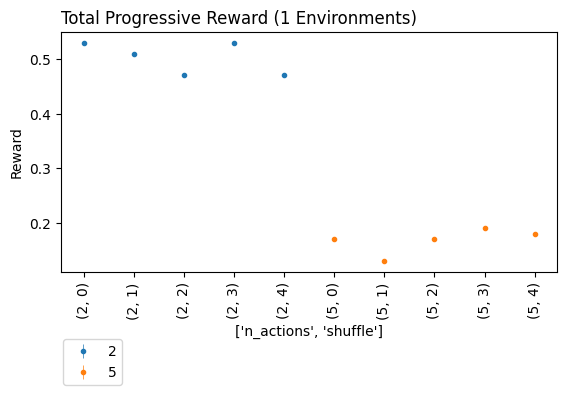

In [8]:
result.plot_learners(x=['n_actions','shuffle'],l='n_actions', p= None,err='se')

## 4. Overlaying Result Plots

It is possible to overlay multiple plots generated by the same result or separate results. Here we make a quick result.

In [2]:
import coba as cb
env0 = cb.Environments.from_linear_synthetic(100,n_actions=5,seed=1).binary().shuffle(n=16)
lrn0 = cb.RandomLearner()
result = cb.Experiment(env0,lrn0).run(quiet=True)

To overlay plots we tell coba to not output the plot by passing in `plot_learners(out=None)`.

Once we've done that we can call result again to generate a second plot that we overlay.

Below we overlay the standard error on top of the standard deviation around the mean.

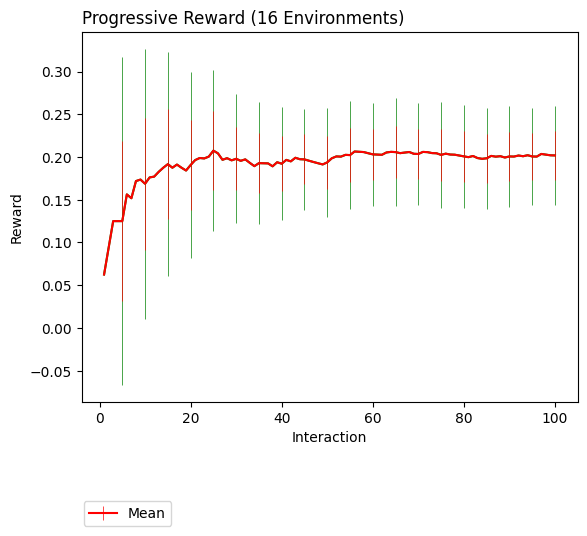

In [6]:
result.plot_learners(l='learner_id',p= None, colors="green", labels=''    , err='sd', out=None)
result.plot_learners(l='learner_id',p= None, colors="red"  , labels='Mean', err='se', out=None)

And here we overlay a learner's overall mean performance on top of the underlying evaluations.

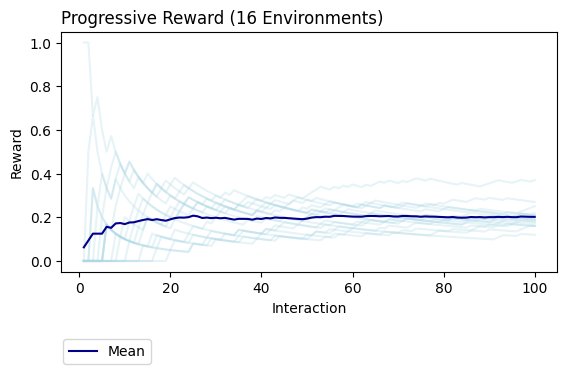

In [19]:
result.plot_learners(l='shuffle'   ,p= None, colors="#ADD8E6", labels=''    , alpha=.3, out=None)
result.plot_learners(l='learner_id',p= None, colors="#00008B", labels='Mean'                    )

## 5. Plotting Direct Comparisons
To know the best performer between two learners we can use `plot_contrast`. This will plot the difference of learners on environments.

In [18]:
import matplotlib.pyplot as plt
import coba as cb

env0 = cb.Environments.from_linear_synthetic(200,n_actions=2,seed=1).binary().shuffle(n=5)
env1 = cb.Environments.from_linear_synthetic(200,n_actions=2,seed=2).binary().shuffle(n=5)
env2 = cb.Environments.from_linear_synthetic(200,n_actions=2,seed=3).binary().shuffle(n=5)

lrn0 = cb.RandomLearner()
lrn1 = cb.VowpalEpsilonLearner()

result = cb.Experiment(env0+env1+env2,[lrn0,lrn1]).run(quiet=True)

Below we show the same results in two different ways. The first we show the average reward for each learner on each environment seed.

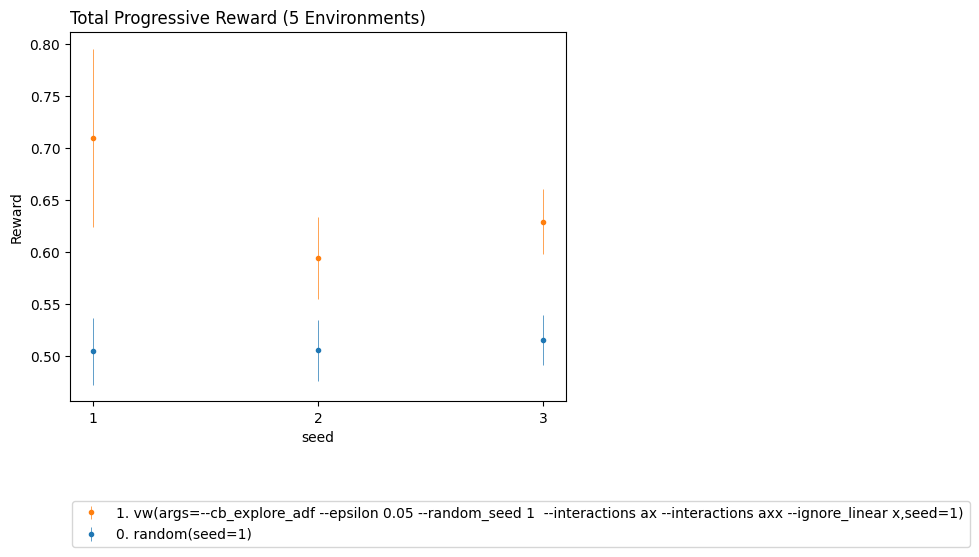

In [29]:
result.plot_learners(x='seed',err='se',out=None)
plt.xticks([1,2,3],[1,2,3])
plt.show()

For the second we show the average difference in performance. Notice that the point estimates below are the same as the distance between the blue and orange point estimates above. This plot is similar to a collection of paired hypothesis tests. When the confidence intervals around the point estimate don't contain 0 we can say that one learner outperformed the other with statistical significance. In this case The VowpalEpsilonLearner outperforms random selection on all datasets.

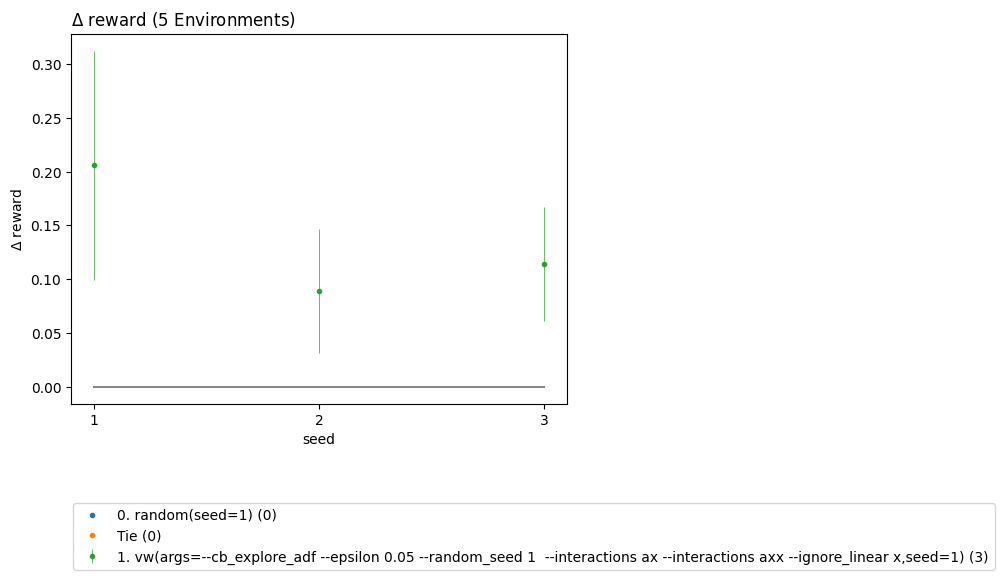

In [50]:
learner_id1 = 0
learner_id2 = 1
result.plot_contrast(learner_id1,learner_id2,l='learner_id',x='seed',xorder='+',err='se',out=None)
plt.xticks([1,2,3],[1,2,3])
plt.show()

We can also contrast by custom variables. Here we contrast a learner's performance with respect to pre-conditioning.

In [1]:
import coba as cb

env0 = cb.Environments.from_openml(180).reservoir(4000,seeds=range(20))
env1 = env0.scale('min'   ,'minmax') 
env2 = env0.scale('mean'  ,'std'   )
env3 = env0.scale('median','iqr'   )

envs  = env0 #no scaling
envs += env1 #scales features to [0,1]                    (aka, sklearn MinMaxScaler)
envs += env2 #scales features to approximately [-std,std] (aka, sklearn StandardScaler)
envs += env3 #scales features to approximately [-iqr,iqr] (aka, sklearn RobustScaler)

lrn = cb.VowpalEpsilonLearner()

result = cb.Experiment(envs,lrn).run(processes=4,quiet=True)

To determine the variable we want to contrast on we set `l`. We then the specific `l` values to contrast in `l1` and `l2`.

We set `p` below so that plot_contrast knows we want to diff `reward(l1,openml_data,reservoir_seed) - reward(l2,openml_data,reservoir_seed)`.

The conclusion we can draw from below is that the standard scaling and robust scaling give a small performance boost over no scaling.

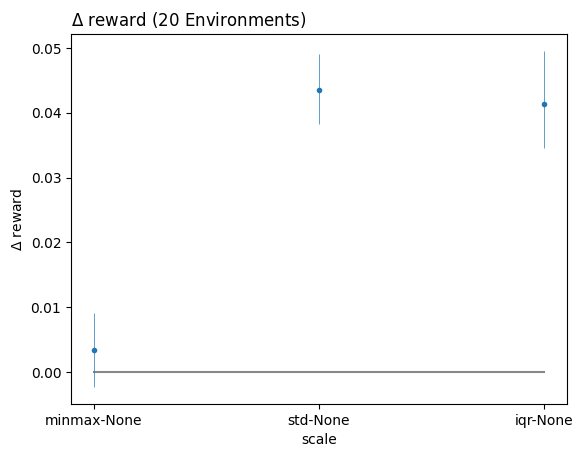

In [3]:
result.plot_contrast(l1=None,l2=['minmax','std','iqr'],l='scale',x='scale',p=['openml_data','reservoir_seed'],mode='diff',err='bs')

And here is the plot of the absolute values (i.e., rewards before differencing).

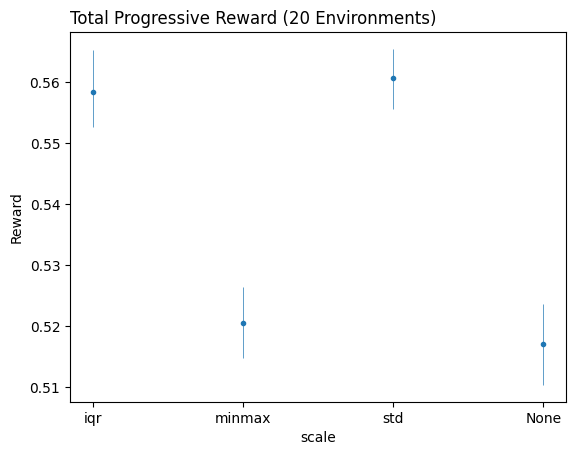

In [9]:
result.plot_learners(x='scale',p=None,err='bs',legend=False)

Alternatively, we could also plot the probability that l2 > l1 using a binomial confidence interval.

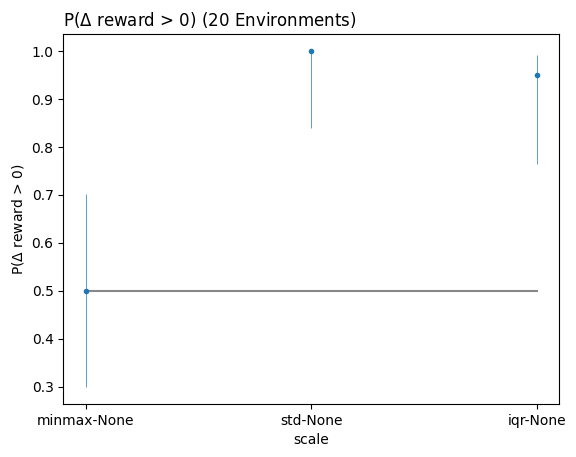

In [6]:
result.plot_contrast(l1=None,l2=['minmax','std','iqr'],l='scale',x='scale',p=['openml_data','reservoir_seed'],mode='prob',err='bi')

## 5. Post Hoc Hyperparameter Tuning
The result plots also supports post-hoc hyperparameter tuning. It is post-hoc in the sense that all hyperparameters must be fully evaluated in the initial experiment. The tuning only happens via selection after the fact. This gives one an idea of how well a learner could have performed had appropriate tuning been applied up-front.

In [26]:
import matplotlib.pyplot as plt
import coba as cb

env0 = cb.Environments.from_linear_synthetic(1000,n_actions=3,seed=1).binary().shuffle(n=5)
env1 = cb.Environments.from_mlp_synthetic(1000,n_actions=3,seed=2).binary().shuffle(n=5)

lrn1 = cb.VowpalEpsilonLearner(epsilon=0.01,features=['a','ax'])
lrn2 = cb.VowpalEpsilonLearner(epsilon=0.05,features=['a','ax','axx'])

result = cb.Experiment(env0+env1,[lrn1,lrn2]).run(quiet=True)

We see that the linear VW learner does very well on the linear environment while the non-linear VW learner does better on the non-linear environment

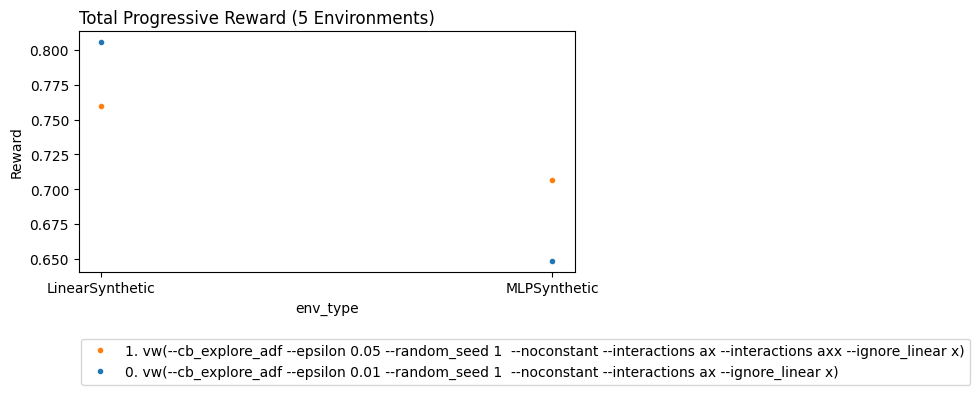

In [29]:
result.plot_learners(x='env_type')

Using `where_best` filter we can post-hoc keep only the best learner in each family for each environment type

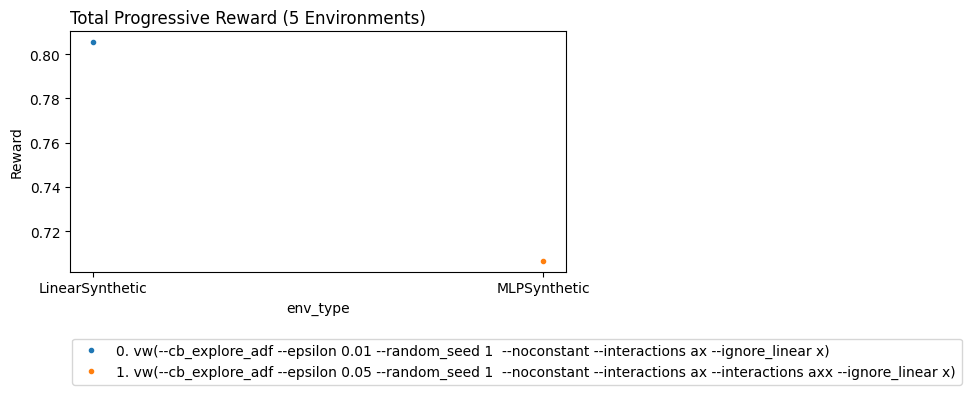

In [30]:
result.where_best(l='family',p='env_type',n=500).plot_learners(x='env_type',p=None)

We can overlay the average performance of best VW per environment over both underlying VW learners.

The green line is the average performance had we used the linear VW learner on the linear environment and the non-linear VW learner on the non-linear environment.

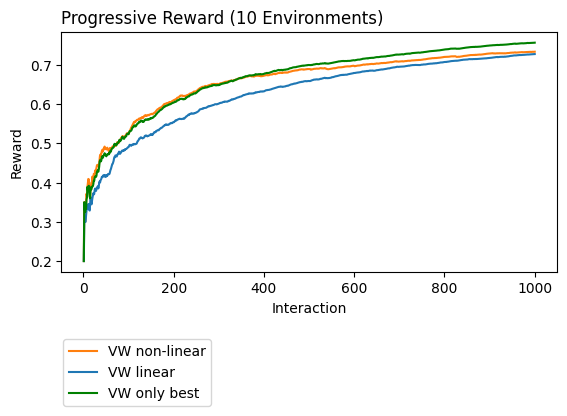

In [33]:
result.plot_learners(out=None,labels=['VW linear','VW non-linear'])
result.where_best(l='family',p='env_type',n=500).plot_learners(l='family',colors='green',labels='VW only best')

## 6. Adjusting Moving Average
We can adjust the number of preceeding interactions to use when averaging `y` via the `span` parameter. By default coba plots the total average.

In [7]:
import coba as cb
env0 = cb.Environments.from_linear_synthetic(100,n_actions=5,seed=1).binary().shuffle(n=16)
lrn0 = cb.RandomLearner()
result = cb.Experiment(env0,lrn0).run(quiet=True)

This overlays different window sizes for calculating the moving average.

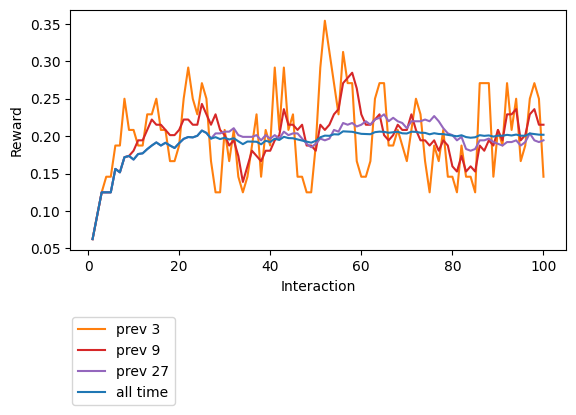

In [11]:
result.plot_learners(span=3    ,out=None,labels='prev 3'  ,colors=1)
result.plot_learners(span=9    ,out=None,labels='prev 9'  ,colors=3)
result.plot_learners(span=27   ,out=None,labels='prev 27' ,colors=4)
result.plot_learners(span=None,out=None,labels='all time' ,colors=0, title='')

## 6. Determining Confidence Intervals

To calculate confidence intervals in Result plots we require multiple observations per point. 

For example, in the code below no confidence intervals can be calculated because there is only one environment per learner.

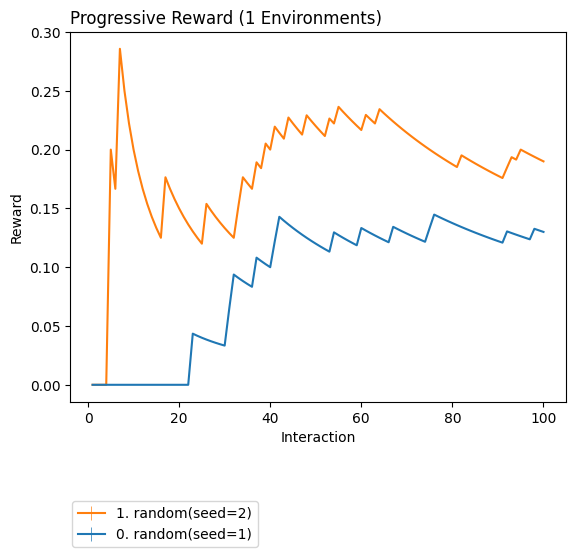

In [19]:
import coba as cb
env0 = cb.Environments.from_linear_synthetic(100,n_actions=5,seed=1).binary()
lrns = [cb.RandomLearner(seed=1),cb.RandomLearner(seed=2)]
cb.Experiment(env0,lrns).run(quiet=True).plot_learners(err='se')

To generate multiple environments we can simply shuffle the given environment

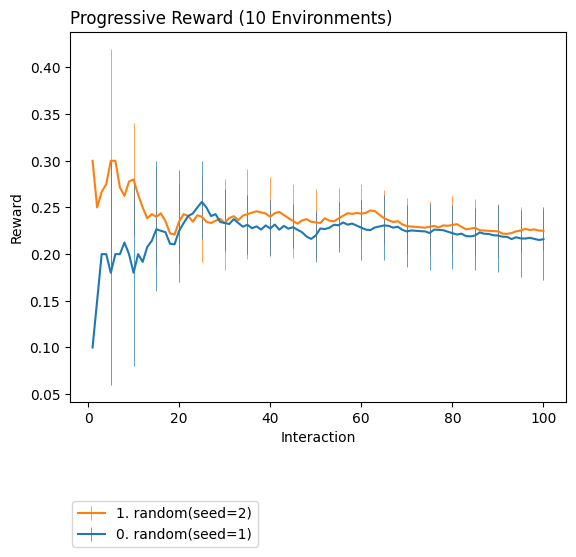

In [9]:
import coba as cb
env0 = cb.Environments.from_linear_synthetic(100,n_actions=5,seed=1).binary().shuffle(n=10)
lrns = [cb.RandomLearner(seed=1),cb.RandomLearner(seed=2)]
cb.Experiment(env0,lrns).run(quiet=True).plot_learners(err='bs')

Coba supports four types of confidence intervals natively
1. Std Deviation (`err='std'`)
2. Std Error (`err='se'`)
3. Bootstrap (`err='bs'`)
4. Binomial (`err='bi'`)

Some of these can be customized by instantiating its esimator directly as shown below where we increase the confidence level from the default of .95 to .99

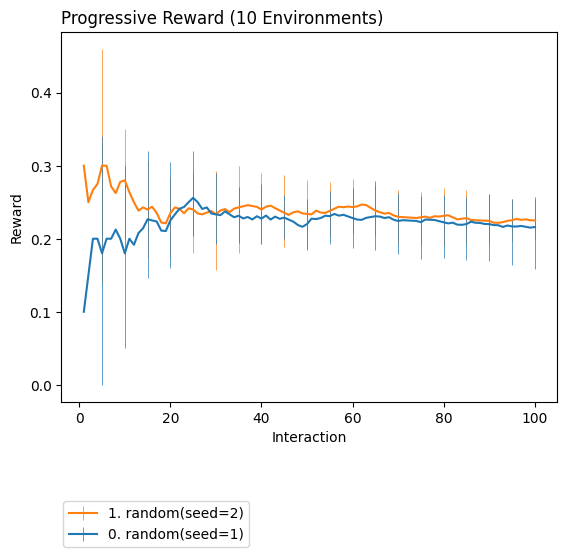

In [10]:
import coba as cb

env0 = cb.Environments.from_linear_synthetic(100,n_actions=5,seed=1).binary().shuffle(n=10)
lrns = [cb.RandomLearner(seed=1),cb.RandomLearner(seed=2)]

cb.Experiment(env0,lrns).run(quiet=True).plot_learners(err=cb.BootstrapCI(.99,cb.mean))